In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 30kB/s 


In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [0]:
from google.colab import files
# In order to use this, you need to upload the datasets
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
        #print(labels)
    return images, labels

path_sign_mnist_train = files.upload()
path_sign_mnist_test = files.upload()
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

Saving sign_mnist_train.csv to sign_mnist_train.csv


KeyboardInterrupt: ignored

In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=-1)
testing_images = np.expand_dims(testing_images, axis=-1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest"
    )

validation_datagen = ImageDataGenerator(rescale=1.0/255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
# Define the model
from tensorflow.keras import regularizers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1),padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu', padding='same')),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(1,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(25, activation=tf.nn.softmax)])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [0]:
# Compile Model. 

model.compile(optimizer=tf.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the Model
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=128),
                              epochs = 30,
                              validation_data=validation_datagen.flow(testing_images, testing_labels))
model.evaluate(testing_images, testing_labels, verbose=1)

Epoch 1/30
215/215 [==============================] - 12s 56ms/step - loss: 2.5517 - accuracy: 0.2626 - val_loss: 1.2163 - val_accuracy: 0.6577
Epoch 2/30
215/215 [==============================] - 11s 53ms/step - loss: 1.2245 - accuracy: 0.6492 - val_loss: 0.7091 - val_accuracy: 0.8193
Epoch 3/30
215/215 [==============================] - 12s 56ms/step - loss: 0.8326 - accuracy: 0.7882 - val_loss: 0.5095 - val_accuracy: 0.9057
Epoch 4/30
215/215 [==============================] - 12s 54ms/step - loss: 0.6734 - accuracy: 0.8453 - val_loss: 0.4192 - val_accuracy: 0.9371
Epoch 5/30
215/215 [==============================] - 12s 55ms/step - loss: 0.5583 - accuracy: 0.8863 - val_loss: 0.3427 - val_accuracy: 0.9665
Epoch 6/30
215/215 [==============================] - 12s 55ms/step - loss: 0.5043 - accuracy: 0.9095 - val_loss: 0.3045 - val_accuracy: 0.9760
Epoch 7/30
215/215 [==============================] - 12s 55ms/step - loss: 0.4664 - accuracy: 0.9196 - val_loss: 0.2976 - val_accuracy:

[15.461328506469727, 0.9687674045562744]

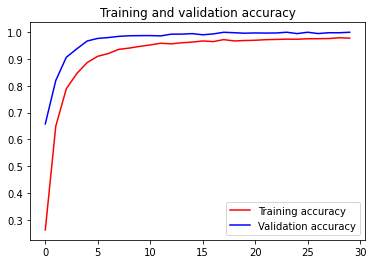

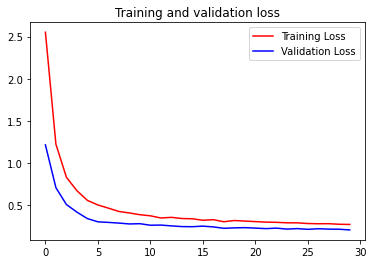

In [0]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()